# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
# set up lists to hold reponse info
citys = []
lat = []
temp = []
humidity = []
cloudiness = []
windspeed = []

url = "http://api.openweathermap.org/data/2.5/weather?"

# Get weather data
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
    try:
        citys.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        print("processing city_name:", weather_response['name'], ", city_id:", weather_response['id'])
    except:
        print("Oops! ",weather_response['message']," Skipping...")  


processing city_name: Rikitea , city_id: 4030556
processing city_name: Seoul , city_id: 1835848
processing city_name: Neiafu , city_id: 4032420
Oops!  city not found  Skipping...
processing city_name: Hermanus , city_id: 3366880
processing city_name: Longyearbyen , city_id: 2729907
processing city_name: Port Alfred , city_id: 964432
processing city_name: Ponta do Sol , city_id: 3453439
processing city_name: Albany , city_id: 5106834
processing city_name: Guerrero Negro , city_id: 4021858
processing city_name: Punta Arenas , city_id: 3874787
processing city_name: Frantiskovy Lazne , city_id: 3076136
processing city_name: Jamestown , city_id: 2069194
processing city_name: Qaanaaq , city_id: 3831208
Oops!  city not found  Skipping...
processing city_name: Butaritari , city_id: 2110227
processing city_name: Busselton , city_id: 2075265
processing city_name: Cap-aux-Meules , city_id: 5915327
processing city_name: Bluff , city_id: 2175403
processing city_name: Mar del Plata , city_id: 386337

processing city_name: Opuwo , city_id: 3354077
processing city_name: Jeremoabo , city_id: 3459922
processing city_name: Issoire , city_id: 3012664
processing city_name: Peniche , city_id: 2264923
processing city_name: Barnstaple , city_id: 2656281
processing city_name: Castro , city_id: 3896218
processing city_name: Provideniya , city_id: 4031574
Oops!  city not found  Skipping...
processing city_name: Pecanha , city_id: 3454628
processing city_name: Beaverlodge , city_id: 5896969
processing city_name: Magdagachi , city_id: 2020591
processing city_name: Hambantota , city_id: 1244926
processing city_name: Lompoc , city_id: 5367788
processing city_name: Cherskiy , city_id: 2126199
processing city_name: Nuuk , city_id: 3421319
processing city_name: Aksarka , city_id: 1512019
processing city_name: College , city_id: 5859699
processing city_name: Adrar , city_id: 2508813
processing city_name: Nanortalik , city_id: 3421765
Oops!  city not found  Skipping...
processing city_name: Skjervoy , c

processing city_name: Pontianak , city_id: 1630789
processing city_name: Hami , city_id: 1529484
Oops!  city not found  Skipping...
processing city_name: Calvinia , city_id: 3369174
processing city_name: Lubango , city_id: 3347762
processing city_name: Champerico , city_id: 3530097
processing city_name: San Cristobal , city_id: 3652462
processing city_name: Dire , city_id: 328880
processing city_name: Pangody , city_id: 1495626
processing city_name: Poum , city_id: 787487
processing city_name: Pevek , city_id: 2122090
processing city_name: Yangcun , city_id: 1553399
processing city_name: Todos Santos , city_id: 3981432
processing city_name: Aljezur , city_id: 2271968
processing city_name: Igatpuri , city_id: 1269810
processing city_name: Wasilla , city_id: 5877641
Oops!  city not found  Skipping...
Oops!  city not found  Skipping...
processing city_name: Maymyo , city_id: 1309937
processing city_name: Devrek , city_id: 748167
processing city_name: Adolfo Lopez Mateos , city_id: 3979962

processing city_name: Colares , city_id: 2269142
processing city_name: Morondava , city_id: 1058381
processing city_name: Port Macquarie , city_id: 2152659
processing city_name: Pakokku , city_id: 1302439
processing city_name: Serebryanyy Bor , city_id: 2016977
processing city_name: Coahuayana , city_id: 3981460
processing city_name: Atambua , city_id: 1651103
processing city_name: Oriximina , city_id: 3393471
processing city_name: Ilulissat , city_id: 3423146
processing city_name: Alboraya , city_id: 2522203
processing city_name: Russell , city_id: 3844421
processing city_name: Ambovombe , city_id: 1079048
processing city_name: Bubaque , city_id: 2374583
processing city_name: Zhigansk , city_id: 2012530
processing city_name: Savelugu , city_id: 2295517
processing city_name: Wenzhou , city_id: 1791388
processing city_name: Arman , city_id: 2127060
processing city_name: Zemio , city_id: 235826
processing city_name: Pangkalanbuun , city_id: 1632694
processing city_name: Cochrane , city_i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
weather_dict = {
    "city": citys,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,temp,humidity,cloudiness,windspeed
0,Rikitea,-23.12,295.148,71,100,10.39
1,Seoul,37.57,292.520,106,90,1.00
2,Neiafu,-18.65,298.150,94,40,6.52
3,Hermanus,-34.42,284.820,77,100,4.53
4,Longyearbyen,78.22,280.150,74,75,2.10


In [52]:
weather_data.count()

city          526
lat           526
temp          526
humidity      526
cloudiness    526
windspeed     526
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

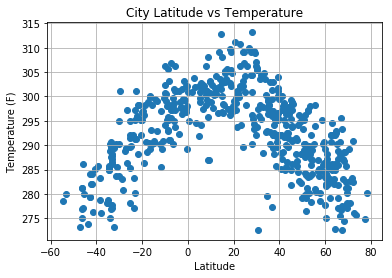

In [45]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

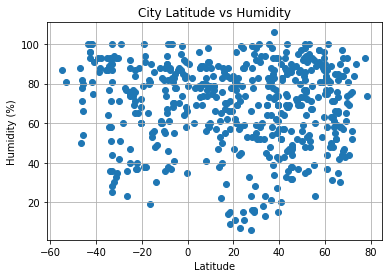

In [46]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

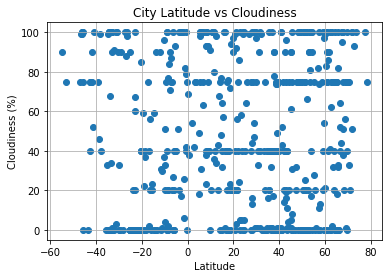

In [48]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

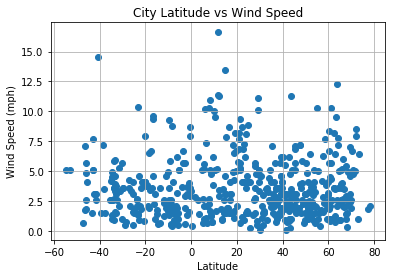

In [50]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()

#### Save Data to csv file

In [55]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

#### Observable Trends

In [ ]:
# 1. The temp graph has a strong concave shape that peaks in and around 0-20 latitude providing strong support that tempature 
#    gets hotter the closer you get to the equator
# 2. There is no strong correlation between humidity and latitude, cloudiness and latitude or wind speed and latitude.
# 3. Most cities appear to have a humidity between 60 and 100%
